(array([1152.,  290.,  118.,   73.,   45.,   21.,   20.,    5.,   40.,
          17.]),
 array([0.00460289, 0.10192435, 0.19924581, 0.29656727, 0.39388873,
        0.49121018, 0.58853164, 0.6858531 , 0.78317456, 0.88049602,
        0.97781748]),
 <BarContainer object of 10 artists>)

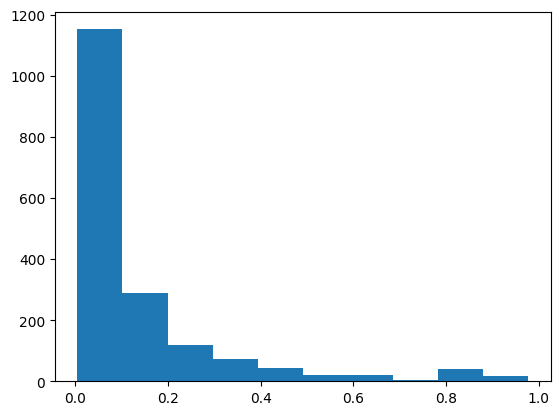

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt


df = pd.read_csv('all_XG_data.csv')
df.head()
df.shape

plt.hist(df['XG'])

In [2]:
variables = df.columns
input_variables = variables[variables != 'XG']

X = df[input_variables]
y = df['XG']
y_log = np.log(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

print(y_train)
print(y)


175    -1.392357
629    -2.827399
1105   -2.288443
1740   -2.381547
1013   -2.434864
          ...   
1130   -0.519634
1294   -1.042099
860    -2.011251
1459   -3.936991
1126   -3.377371
Name: XG, Length: 1424, dtype: float64
0       0.031976
1       0.008036
2       0.140692
3       0.039328
4       0.032946
          ...   
1776    0.140141
1777    0.111705
1778    0.055328
1779    0.048067
1780    0.504271
Name: XG, Length: 1781, dtype: float64


In [3]:


variables = df.columns
input_variables = variables[variables != 'XG']

X = df[input_variables]
y = df['XG']
y_log = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=90)

param_distributions = {
    'booster': ['gblinear', 'dart', 'gbtree'],  # List of discrete values
    'learning_rate': uniform(0.001, 0.1),  # Continuous uniform distribution between 0.01 and 0.2
    'max_leaves': randint(20, 200),  # Integer values between 20 and 100
    'n_estimators': randint(50, 400),  # Integer values between 50 and 300
    'max_depth': randint(3, 15),  # Integer values between 3 and 10
    'grow_policy': ['depthwise', 'lossguide'],  # List of discrete values
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=2,
    verbose=3,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(f"Best Random Search Score: {random_search.best_score_:.5f}")
print(f"Best Random Search Parameters: {random_search.best_params_}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Search Score: -0.56140
Best Random Search Parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'learning_rate': np.float64(0.06630205132311011), 'max_depth': 8, 'max_leaves': 38, 'n_estimators': 328}


Mean Absolute Error (MAE): 0.05293798170193237


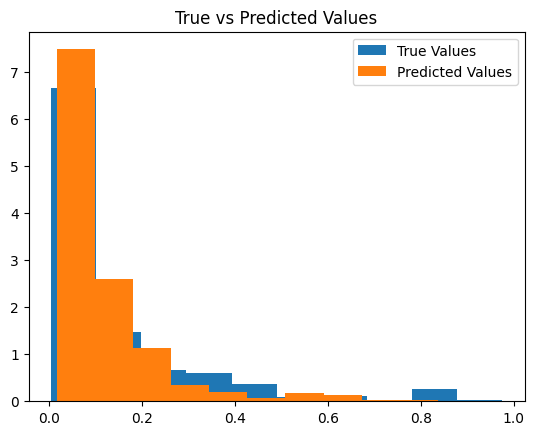

In [10]:
import matplotlib.pyplot as plt

def mae(y_true, y_pred):
    return np.mean(abs((y_true - y_pred)))

#new_params = {'booster': 'gbtree',
#              'grow_policy': 'lossguide', 
#              'learning_rate': np.float64(0.05185817934340634), 
#              'max_depth': 9, 
#              'max_leaves': 35, 
#              'n_estimators': 283}

new_params =  {'booster': 'dart', 'grow_policy': 'lossguide', 'learning_rate': np.float64(0.06630205132311011), 'max_depth': 8, 'max_leaves': 38, 'n_estimators': 328}
#new_params = {'booster': 'gbtree', 'grow_policy': 'depthwise', 'learning_rate': np.float64(0.03418737125398759), 'max_depth': 5, 'max_leaves': 77, 'n_estimators': 274}
#both new params have mae of about 0.065

xgb_best = XGBRegressor(**new_params, objective='reg:squarederror', random_state=30)

xgb_best.fit(X_train, y_train)
y_score = xgb_best.predict(X_test)

meow = mae(y_test, y_score)

y_back = np.exp(y_score) 
y_back_test = np.exp(y_test) 
meow_back = mae(y_back_test, y_back)

print(f"Mean Absolute Error (MAE): {meow_back}")

plt.hist(y_back_test, label='True Values', density= True)
plt.hist(y_back, label='Predicted Values', density = True)
plt.title('True vs Predicted Values')
plt.legend()


In [11]:
print(mae(y_back_test, y_back))


hist, bins = np.histogram(y_back_test, bins=100)
print(hist)

xgb_best.feature_importances_

0.05293798170193237
[ 7 30 40 28 31 33 18 18 15 11  3 12 10  8  4  1  5  1  3  4  4  1  3  3
  2  2  1  4  1  2  2  2  3  2  5  3  0  2  1  1  1  2  3  3  1  1  0  2
  0  0  1  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  1  3  0  0  0  0
  0  1  0  0  0  0  0  0  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1]


array([0.00416778, 0.        , 0.20355192, 0.04585123, 0.04647332,
       0.00647751, 0.09802138, 0.12847959, 0.0119461 , 0.00498167,
       0.00427905, 0.00307938, 0.00529757, 0.00330608, 0.00381383,
       0.0033428 , 0.00221798, 0.00256748, 0.0047636 , 0.00342717,
       0.00233893, 0.00353657, 0.00398656, 0.00396026, 0.004579  ,
       0.0034031 , 0.00382377, 0.00246558, 0.00343157, 0.00186284,
       0.00497381, 0.00255028, 0.00328297, 0.02842978, 0.00439542,
       0.00185092, 0.00322862, 0.00306063, 0.0030942 , 0.04732227,
       0.07507211, 0.01167065, 0.01364204, 0.00856675, 0.00437345,
       0.00510131, 0.00434852, 0.00518192, 0.00411934, 0.00324297,
       0.00172398, 0.01011737, 0.0032308 , 0.00239768, 0.01472863,
       0.00220714, 0.00222419, 0.00917153, 0.00224046, 0.00228074,
       0.01189318, 0.00437795, 0.00329064, 0.0214997 , 0.00264109,
       0.00439525, 0.0086952 , 0.00223189, 0.00381523, 0.02315046,
       0.0028178 , 0.0039275 ], dtype=float32)

C:\Users\nrt\AppData\Local\Temp\ipykernel_2956\1760537452.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=input_variables[sorted_idx])


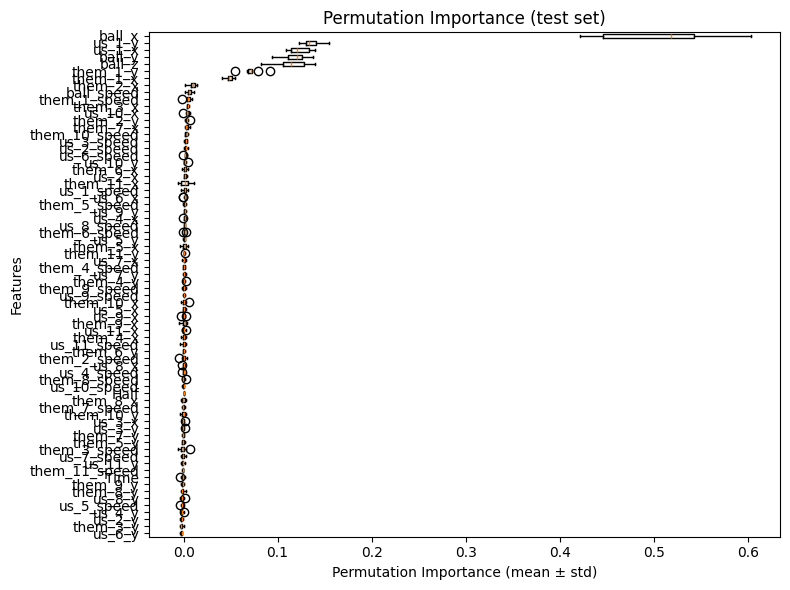

In [12]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb_best, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[::1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=input_variables[sorted_idx])
ax.set_title("Permutation Importance (test set)")
ax.set_xlabel("Permutation Importance (mean ± std)")
ax.set_ylabel("Features")
plt.tight_layout()
plt.show()


Index(['us_6_y', 'them_3_y', 'us_2_y', 'us_4_y', 'us_5_speed', 'us_8_y',
       'them_8_y', 'them_9_y', 'Time', 'them_11_speed', 'us_11_y',
       'us_7_speed', 'them_3_speed', 'them_5_y', 'them_7_y', 'us_3_y',
       'us_3_x', 'them_10_y', 'them_7_speed', 'them_8_x', 'Half',
       'us_10_speed', 'them_8_speed', 'us_4_speed', 'us_8_x', 'them_2_speed',
       'them_6_y', 'us_11_speed', 'them_4_x', 'us_11_x', 'them_9_x', 'us_9_x',
       'us_5_x', 'them_10_x', 'us_9_speed', 'them_9_speed', 'them_4_y',
       'us_7_y', 'them_4_speed', 'us_7_x', 'them_11_y', 'them_5_x', 'us_5_y',
       'them_6_speed', 'us_8_speed', 'us_4_x', 'us_9_y', 'them_5_speed',
       'us_6_x', 'us_1_speed', 'them_11_x', 'us_2_x', 'them_6_x', 'us_10_y',
       'us_6_speed', 'us_2_speed', 'us_3_speed', 'them_10_speed', 'them_7_x',
       'them_2_y', 'us_10_x', 'them_3_x', 'them_1_speed', 'ball_speed',
       'them_2_x', 'them_1_x', 'them_1_y', 'ball_z', 'ball_y', 'us_1_x',
       'us_1_y', 'ball_x'],
      dtype='ob

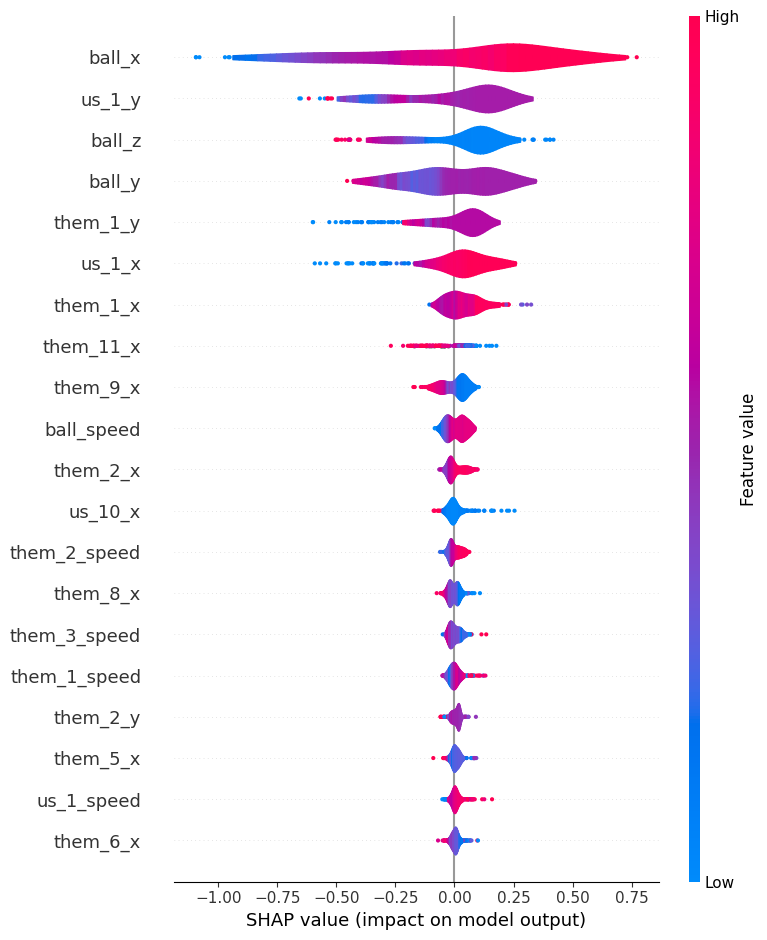

In [13]:
print(input_variables[sorted_idx])

import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, feature_names=input_variables, plot_type="violin")
plt.show()

In [14]:
def generate_random_positions(num_positions, x_min, x_max, y_min, y_max,speed_min, speed_max,  z_min, z_max,time_min, time_max):
    data = {}
    rng = np.random.default_rng()
    data['Time'] = rng.integers(time_min, time_max, num_positions)
    data['Half'] = rng.integers(1, 3, num_positions)
    data['ball_x'] = rng.uniform(x_min, x_max, num_positions)
    data['ball_y'] = rng.uniform(y_min, y_max, num_positions)
    data['ball_z'] = rng.uniform(z_min, z_max, num_positions)
    data['ball_speed'] = rng.uniform(speed_min, speed_max, num_positions)
    for i in range(1, 12):
        data[f'us_{i}_x'] = rng.uniform(x_min, x_max, num_positions)
        data[f'us_{i}_y'] = rng.uniform(y_min, y_max, num_positions)
        data[f'us_{i}_speed'] = rng.uniform(speed_min, speed_max, num_positions)
    for i in range(1, 12):
        data[f'them_{i}_x'] = rng.uniform(x_min, x_max, num_positions)
        data[f'them_{i}_y'] = rng.uniform(y_min, y_max, num_positions)
        data[f'them_{i}_speed'] = rng.uniform(speed_min, speed_max, num_positions)
    df_random = pd.DataFrame(data)
    return df_random

def xg_and_plot(random_line):
    xg = np.exp(xgb_best.predict(random_line))
    fig, ax = plt.subplots()
    ax.scatter(random_line['ball_x'], random_line['ball_y'], cmap='viridis', s=10)
    for i in range(1, 12):
        ax.scatter(random_line[f'us_{i}_x'], random_line[f'us_{i}_y'], c='blue', s=10)
        ax.scatter(random_line[f'them_{i}_x'], random_line[f'them_{i}_y'], c='red', s=10)
    ax.annotate(f'XG: {xg[0]:.2f}', xy=(random_line['ball_x'][0], random_line['ball_y'][0]), fontsize=12, color='black')
    return fig

C:\Users\nrt\AppData\Local\Temp\ipykernel_2956\739148067.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(random_line['ball_x'], random_line['ball_y'], cmap='viridis', s=10)


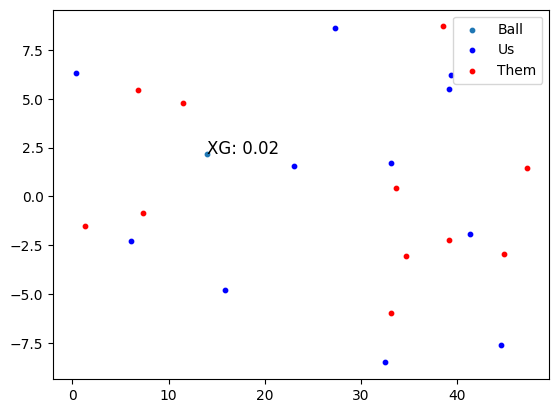

In [20]:
random_line = generate_random_positions(1, 0, 50, -10, 10, 0, 5, 0, 5, 0, 50000)
fig = xg_and_plot(random_line)
plt.legend([ 'Ball', 'Us', 'Them'])
plt.show()